In [ ]:
#################################### This script creates fig. 7 of the article ###############################

In [1]:
# Import modules
import pandas as pd
import numpy as np
import math
import statistics

In [2]:
# Import UAV data from a CSV file
pathToFile = 'F:/Redaction/Bernadouze/Figures/RAW_UAV_DATA.csv'
rawData = pd.read_csv(pathToFile,sep=';')
UAVData = pd.DataFrame(rawData)
UAVData.head()

,Plot,Season,GEP (gCO2.m².hour-1),ER (gCO2.m².hour-1),NEE (gCO2.m².hour-1),B,G,R,RE,NIR,DOY,PAR,TEMP
0,P1,May,-1.86,1.30,-0.56,0.04,0.09,0.10,0.30,0.43,137,0.33,7.36
1,P3,May,-1.47,1.28,-0.19,0.04,0.09,0.07,0.25,0.40,137,0.33,7.36
2,P4,May,-1.25,0.89,-0.36,0.04,0.10,0.08,0.28,0.42,137,0.33,7.36
3,P5,May,-1.84,1.19,-0.65,0.04,0.07,0.05,0.18,0.34,137,0.33,7.36
4,P6,May,-1.27,0.96,-0.31,0.05,0.10,0.09,0.24,0.37,137,0.33,7.36


In [3]:
# Band correspondance
B = UAVData['B']
G = UAVData['G']
R = UAVData['R']
RE = UAVData['RE']
NIR = UAVData['NIR']

In [4]:
# Calculate vegetation indices
UAVData['BCC'] = B / (R + G + B)
UAVData['BRI'] = ((1/G) - (1/RE)) / NIR
UAVData['BWDRVI'] = ((0.1*NIR) -B) / ((0.1*NIR) + B)
UAVData['CIgreen'] = (NIR/G) -1
UAVData['CVI'] = NIR*(R/(G*G))
UAVData['EVI'] = 2.5 * ((NIR - R) / ((NIR + 6 * R - 7.5 * B) + 1))
UAVData['EVI2'] = 2.5 * ((NIR - R) / (NIR + (2.4*R) +1))
UAVData['GARI'] = (NIR - (G - (B-R))) / (NIR - (G + (B-R)))
UAVData['GCC'] = G / (R + G + B)
UAVData['GLI'] = ((2*G) - R - B) / ((2*G) + R + B)
UAVData['GNDVI'] = (NIR - G) / (NIR + G)
UAVData['LCI'] = (NIR - RE) / (NIR + R)
UAVData['NDRE'] = (NIR - RE) / (NIR + RE)
UAVData['NDVI'] = (NIR - R) / (NIR + R)
UAVData['OSAVI'] =  (NIR - R) / (NIR + R + 0.16)
UAVData['RCC'] = R / (R + G + B)
UAVData['RVI'] = NIR / R
UAVData['SIPI'] = (NIR - B) / (NIR - R)
UAVData['TVI'] = np.sqrt(((NIR - R) / (NIR + R)) + 0.5)

UAVData.head()

,Plot,Season,GEP (gCO2.m².hour-1),ER (gCO2.m².hour-1),NEE (gCO2.m².hour-1),B,G,R,RE,NIR,...,GLI,GNDVI,LCI,NDRE,NDVI,OSAVI,RCC,RVI,SIPI,TVI
0,P1,May,-1.86,1.30,-0.56,0.04,0.09,0.10,0.30,0.43,...,0.125000,0.653846,0.245283,0.178082,0.622642,0.478261,0.434783,4.300000,1.181818,1.059548
1,P3,May,-1.47,1.28,-0.19,0.04,0.09,0.07,0.25,0.40,...,0.241379,0.632653,0.319149,0.230769,0.702128,0.523810,0.350000,5.714286,1.090909,1.096416
2,P4,May,-1.25,0.89,-0.36,0.04,0.10,0.08,0.28,0.42,...,0.250000,0.615385,0.280000,0.200000,0.680000,0.515152,0.363636,5.250000,1.117647,1.086278
3,P5,May,-1.84,1.19,-0.65,0.04,0.07,0.05,0.18,0.34,...,0.217391,0.658537,0.410256,0.307692,0.743590,0.527273,0.312500,6.800000,1.034483,1.115164
4,P6,May,-1.27,0.96,-0.31,0.05,0.10,0.09,0.24,0.37,...,0.176471,0.574468,0.282609,0.213115,0.608696,0.451613,0.375000,4.111111,1.142857,1.052946


In [5]:
# Normalisation of all predictive variables between -1 and 1 for modelling issue

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
minmax_df = scaler.fit_transform(UAVData[['B','G','R','RE','NIR','DOY','PAR','TEMP','BCC','BRI','BWDRVI','CIgreen','CVI','EVI','EVI2','GARI','GCC','GLI','GNDVI','LCI','NDRE','NDVI','OSAVI','RCC','RVI','SIPI','TVI']])
minmax_df = pd.DataFrame(minmax_df, columns =['B','G','R','RE','NIR','DOY','PAR','TEMP','BCC','BRI','BWDRVI','CIgreen','CVI','EVI','EVI2','GARI','GCC','GLI','GNDVI','LCI','NDRE','NDVI','OSAVI','RCC','RVI','SIPI','TVI'])
UAVData[['B','G','R','RE','NIR','DOY','PAR','TEMP','BCC','BRI','BWDRVI','CIgreen','CVI','EVI','EVI2','GARI','GCC','GLI','GNDVI','LCI','NDRE','NDVI','OSAVI','RCC','RVI','SIPI','TVI']] = minmax_df[['B','G','R','RE','NIR','DOY','PAR','TEMP','BCC','BRI','BWDRVI','CIgreen','CVI','EVI','EVI2','GARI','GCC','GLI','GNDVI','LCI','NDRE','NDVI','OSAVI','RCC','RVI','SIPI','TVI']]
UAVData.head()

,Plot,Season,GEP (gCO2.m².hour-1),ER (gCO2.m².hour-1),NEE (gCO2.m².hour-1),B,G,R,RE,NIR,...,GLI,GNDVI,LCI,NDRE,NDVI,OSAVI,RCC,RVI,SIPI,TVI
0,P1,May,-1.86,1.30,-0.56,0.5,0.6,1.000000,0.928571,0.761905,...,-0.265873,-0.022281,-0.975119,-1.000000,-0.596716,0.245283,0.806763,-0.839695,0.890909,-0.576983
1,P3,May,-1.47,1.28,-0.19,0.5,0.6,0.333333,0.571429,0.619048,...,0.269841,-0.283322,-0.332242,-0.375955,-0.038493,0.462713,-0.022222,-0.515812,-0.054545,-0.008914
2,P4,May,-1.25,0.89,-0.36,0.5,0.8,0.555556,0.785714,0.714286,...,0.309524,-0.496021,-0.672967,-0.740397,-0.193893,0.421384,0.111111,-0.622137,0.223529,-0.165119
3,P5,May,-1.84,1.19,-0.65,0.5,0.2,-0.111111,0.071429,0.333333,...,0.159420,0.035492,0.460693,0.535150,0.252691,0.479245,-0.388889,-0.267176,-0.641379,0.279954
4,P6,May,-1.27,0.96,-0.31,1.0,0.8,0.777778,0.500000,0.476190,...,-0.028945,-1.000000,-0.650263,-0.585061,-0.694656,0.118077,0.222222,-0.882952,0.485714,-0.678701


In [7]:
# Save csv
UAVData.to_csv('F:/Redaction/Bernadouze/Figures/RAW_UAV_DATA_Indices.csv',index=False)

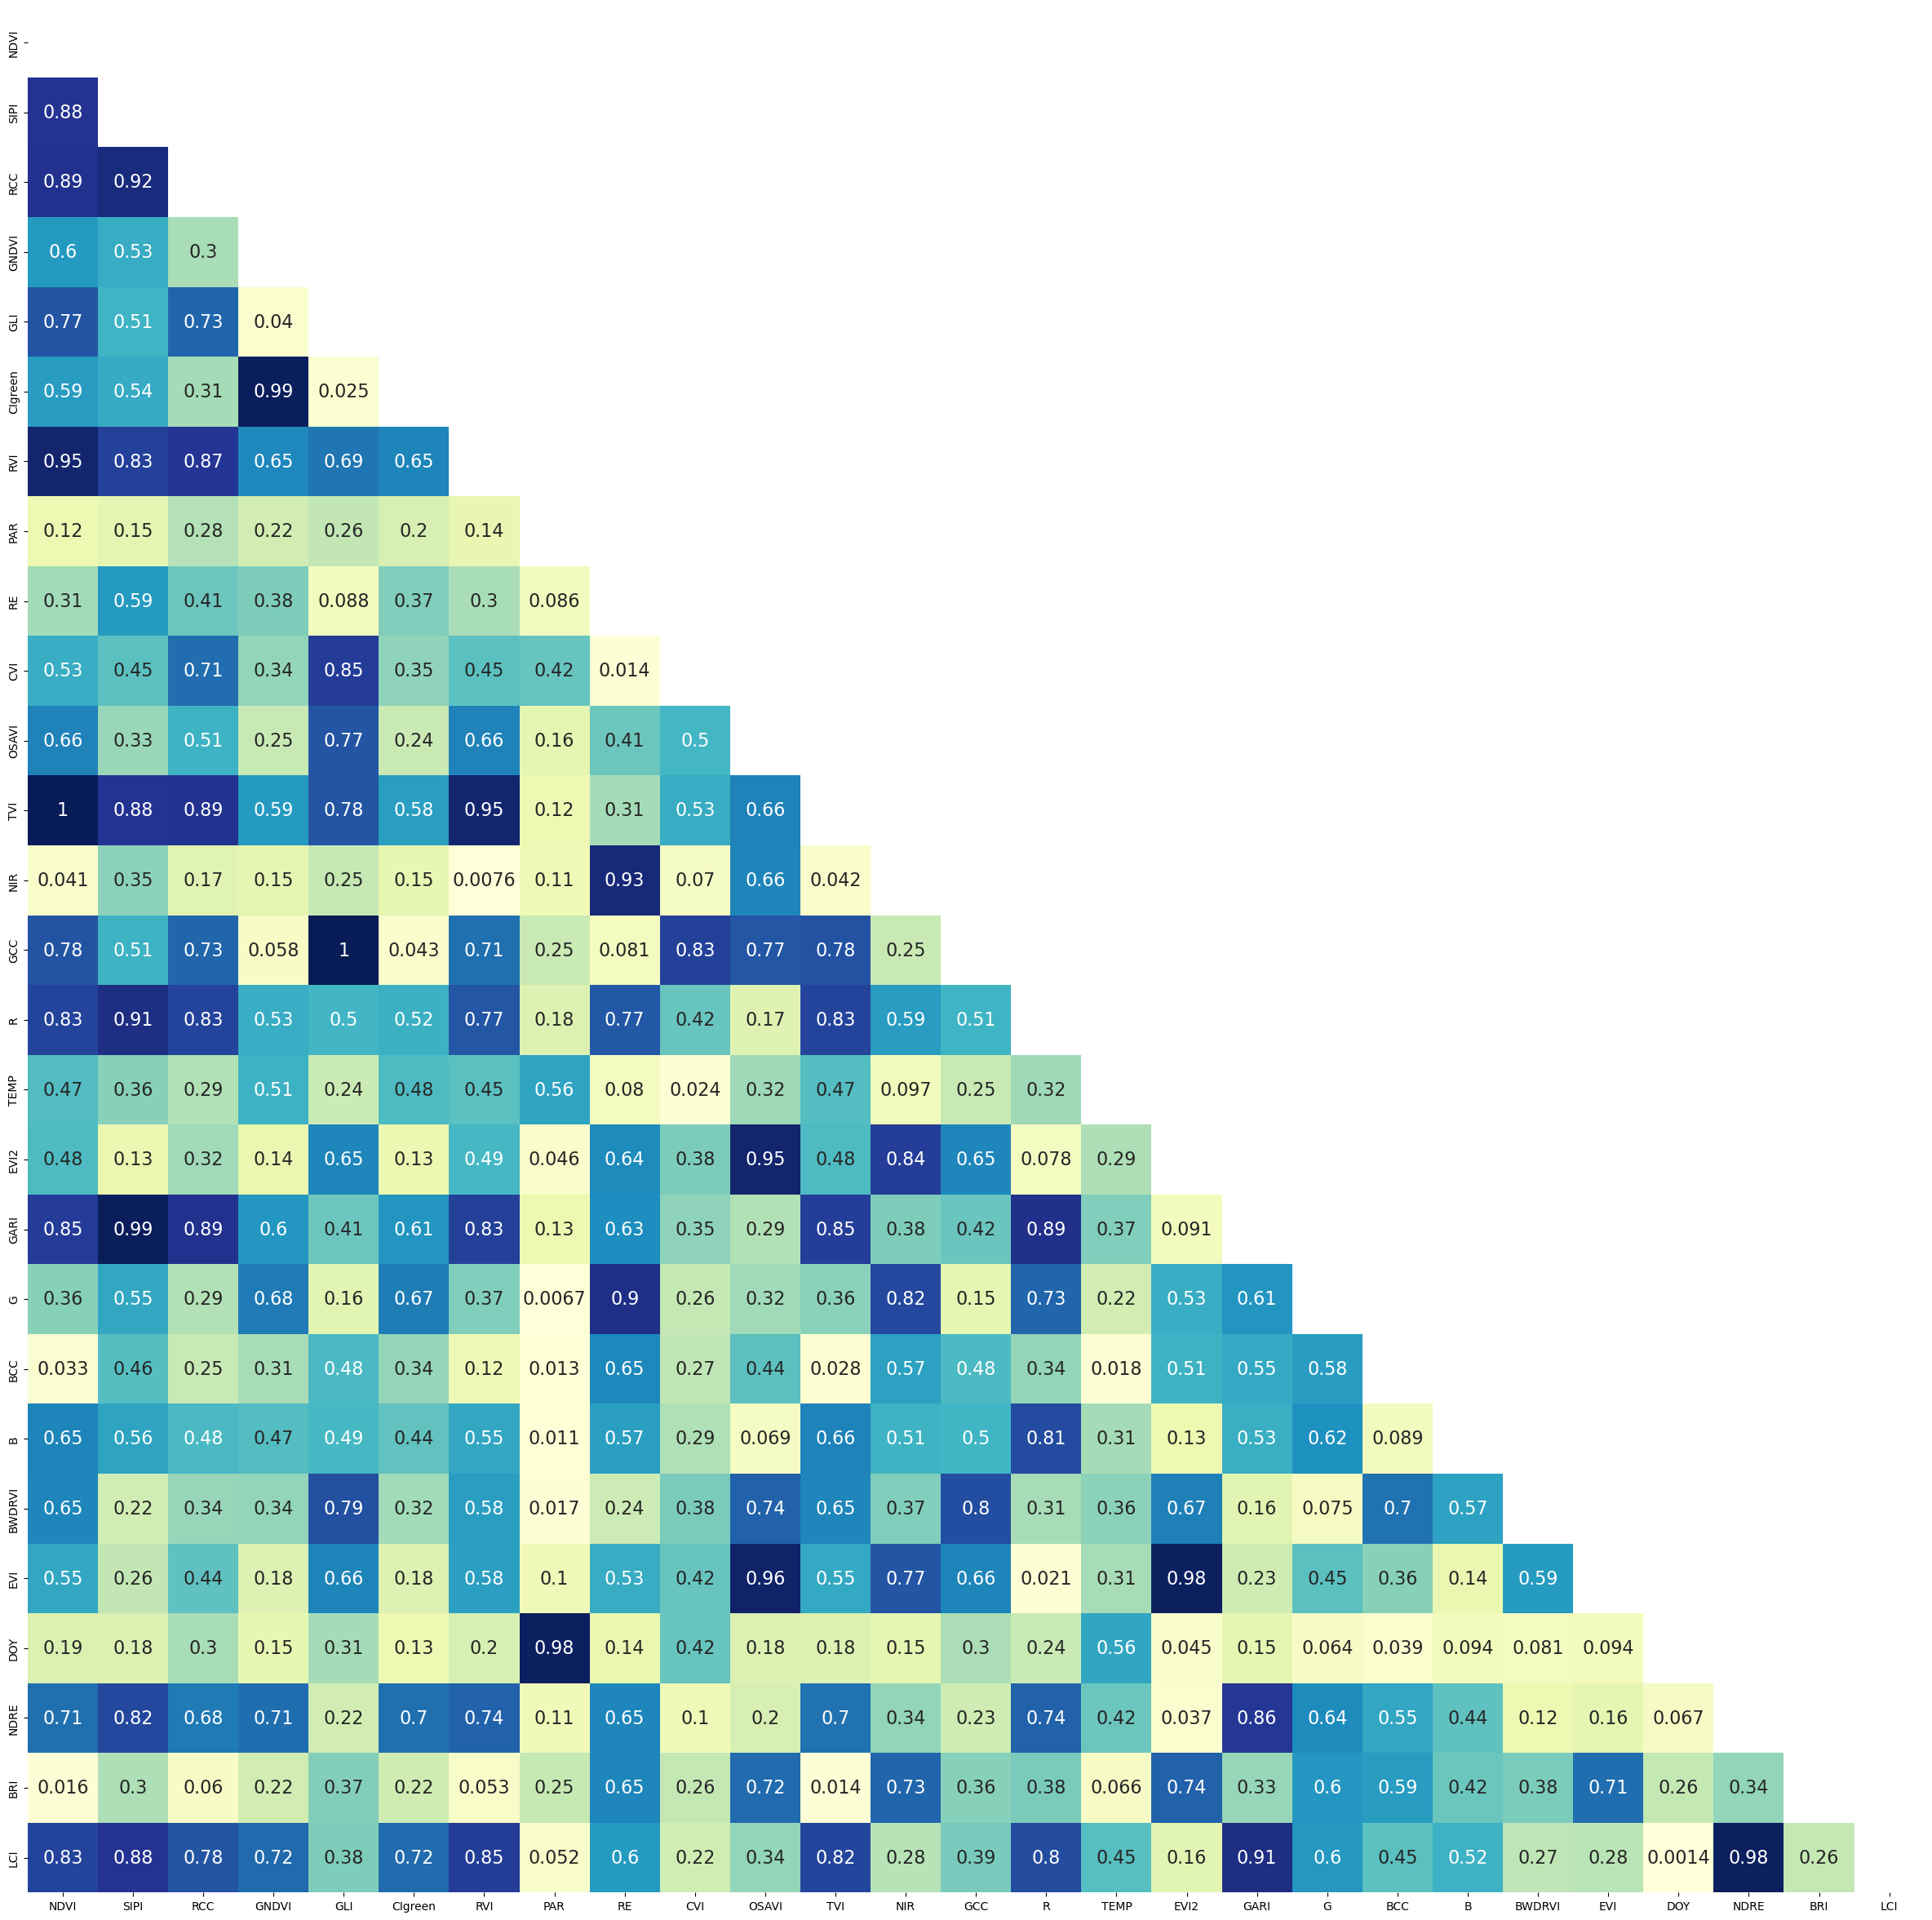

In [22]:
# Computing the correlation coefficient
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import matplotlib.transforms as mtransforms

UAV_X = UAVData[{'PAR','DOY','TEMP', # meteo
             'B','G','R','RE','NIR', # bands
             'BCC','BRI','BWDRVI','CIgreen','CVI','EVI','EVI2','GARI','GCC','GLI','GNDVI','LCI','NDRE','NDVI','OSAVI','RCC','RVI','SIPI','TVI'}] # VIs

# Generate a mask to onlyshow the bottom triangle
maskUAV = np.triu(np.ones_like(UAV_X.corr(), dtype=bool))
sns.heatmap(abs(UAV_X.corr()), cmap="YlGnBu",cbar=False,annot=True,annot_kws={"fontsize":16},mask=maskUAV)
plt.savefig("F:/Redaction/Bernadouze/Figures/Figure7.tif",dpi=300)

# figure size in inches
rcParams['figure.figsize'] = 30,30
plt.show()
